In [1]:
import sqlalchemy
import pyodbc
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import requests
import io
import processing_functions
from site_information_class import SiteDataProcessor
%matplotlib inline



In [2]:
site_id = 19505
import pandas as pd

# Define the DataFrame with start and end times
time_periods = pd.DataFrame({
    'start_date': ['2024-09-20', '2024-03-10'],
    'end_date': ['2024-09-25', '2024-03-20']
})

def load_dataframes(site_id, start_date_str, end_date_str):
    df_raw_sump = None
    df_raw_flow_meter = None
    df_rainfall = None
    df_hour_agg_flow_meter = None
    df_daily_agg_sump = None

    try:
        df_raw_sump = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_raw_sump.xlsx')
        print("Loaded df_raw_sump from xlsx file.")
    except FileNotFoundError:
        print("df_raw_sump xlsx file not found.")

    try:
        df_raw_flow_meter = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_raw_flow_meter.xlsx')
        print("Loaded df_raw_flow_meter from xlsx file.")
    except FileNotFoundError:
        print("df_raw_flow_meter xlsx file not found.")

    try:
        df_rainfall = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_rainfall.xlsx')
        print("Loaded df_rainfall from xlsx file.")
    except FileNotFoundError:
        print("df_rainfall xlsx file not found.")

    try:
        df_hour_agg_flow_meter = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_hour_agg_flow_meter.xlsx')
        print("Loaded df_hour_agg_flow_meter from xlsx file.")
    except FileNotFoundError:
        print("df_hour_agg_flow_meter xlsx file not found.")

    try:
        df_daily_agg_sump = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_daily_agg_sump.xlsx')
        print("Loaded df_daily_agg_sump from xlsx file.")
    except FileNotFoundError:
        print("df_daily_agg_sump xlsx file not found.")

    return df_raw_sump, df_raw_flow_meter, df_rainfall, df_hour_agg_flow_meter, df_daily_agg_sump

# Initialize lists to store the dataframes for each type
df_raw_sump_list = []
df_raw_flow_meter_list = []
df_rainfall_list = []
df_hour_agg_flow_meter_list = []
df_daily_agg_sump_list = []

# Loop through each time period and load the dataframes
for index, row in time_periods.iterrows():
    start_date_str = row['start_date']
    end_date_str = row['end_date']
    df_raw_sump, df_raw_flow_meter, df_rainfall, df_hour_agg_flow_meter, df_daily_agg_sump = load_dataframes(site_id, start_date_str, end_date_str)
    
    if df_raw_sump is not None:
        df_raw_sump_list.append(df_raw_sump)
    if df_raw_flow_meter is not None:
        df_raw_flow_meter_list.append(df_raw_flow_meter)
    if df_rainfall is not None:
        df_rainfall_list.append(df_rainfall)
    if df_hour_agg_flow_meter is not None:
        df_hour_agg_flow_meter_list.append(df_hour_agg_flow_meter)
    if df_daily_agg_sump is not None:
        df_daily_agg_sump_list.append(df_daily_agg_sump)

# Combine the dataframes for each type
df_raw_sump_combined = pd.concat(df_raw_sump_list, ignore_index=True)
df_raw_flow_meter_combined = pd.concat(df_raw_flow_meter_list, ignore_index=True)
df_rainfall_combined = pd.concat(df_rainfall_list, ignore_index=True)
df_hour_agg_flow_meter_combined = pd.concat(df_hour_agg_flow_meter_list, ignore_index=True)
#df_daily_agg_sump_combined = pd.concat(df_daily_agg_sump_list, ignore_index=True)

# Now you have combined dataframes for each type of data

df_raw_sump = df_raw_sump_combined
df_rainfall = df_rainfall_combined 
df_hour_agg_flow_meter = df_hour_agg_flow_meter_combined
df_raw_flow_meter = df_raw_flow_meter_combined


Loaded df_raw_sump from xlsx file.
Loaded df_raw_flow_meter from xlsx file.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.
Loaded df_raw_sump from xlsx file.
df_raw_flow_meter xlsx file not found.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.


In [5]:
# Print the head(5) of each dataframe and save to xlsx
if df_raw_sump is not None:
    print("Head of df_raw_sump:")
    print(df_raw_sump.head(5))



Head of df_raw_sump:
              TimeGMT       date  SourceSystemId  DbAddr        DbName  \
0 2024-09-20 01:00:00 2024-09-20               1   11943  Default Name   
1 2024-09-20 01:05:00 2024-09-20               1   11943  Default Name   
2 2024-09-20 01:10:00 2024-09-20               1   11943  Default Name   
3 2024-09-20 01:15:00 2024-09-20               1   11943  Default Name   
4 2024-09-20 01:20:00 2024-09-20               1   11943  Default Name   

      EValue  Year  Month  Day  
0   7.371094  2024      9   20  
1   8.255859  2024      9   20  
2   9.061035  2024      9   20  
3   9.824219  2024      9   20  
4  10.545410  2024      9   20  


In [7]:
if df_hour_agg_flow_meter is not None:
    print("Head of df_hour_agg_flow_meter:")
    print(df_hour_agg_flow_meter.head(5))

Head of df_hour_agg_flow_meter:
   Hour  DbAddr  count  meanEValue  stddev_EValue  Year  Month  Day
0     0   11726     46       -0.16       0.390992  2024      9   20
1     1   11726     60        6.19      18.430540  2024      9   20
2     2   11726     60        3.21      14.654578  2024      9   20
3     3   11726     60        3.03      13.509219  2024      9   20
4     4   11726     60        6.22      18.991307  2024      9   20


In [9]:
df_raw_flow_meter.head()

,TimeGMT,date,SourceSystemId,DbAddr,DbName,EValue,Year,Month,Day
0,2024-09-20 01:00:00,2024-09-20,1,11726,Default Name,-0.025879,2024,9,20
1,2024-09-20 01:01:00,2024-09-20,1,11726,Default Name,-0.023926,2024,9,20
2,2024-09-20 01:02:00,2024-09-20,1,11726,Default Name,-0.025879,2024,9,20
3,2024-09-20 01:03:00,2024-09-20,1,11726,Default Name,-0.024902,2024,9,20
4,2024-09-20 01:04:00,2024-09-20,1,11726,Default Name,-0.025879,2024,9,20


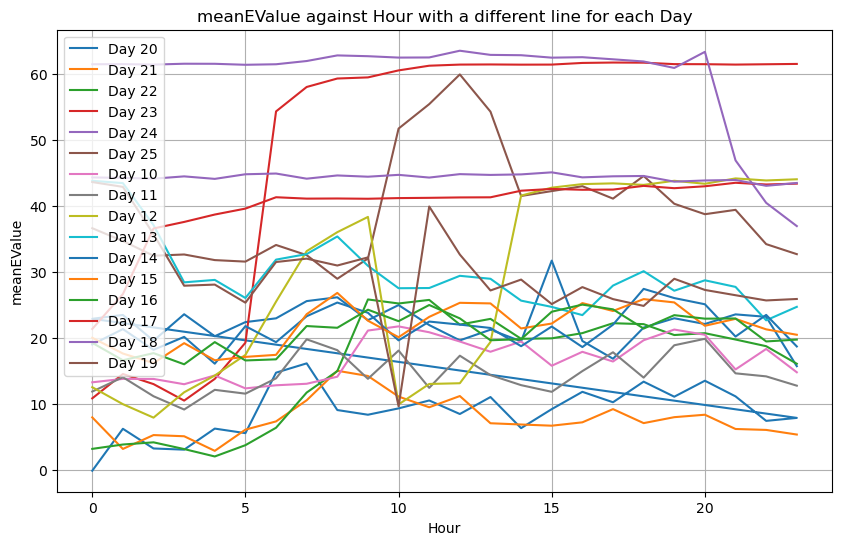

In [11]:
def plot_meanEValue(df):
    """
    Plots 'meanEValue' against 'Hour' with a different line for each 'Day' in the given dataframe.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data with columns 'Hour', 'DbAddr', 'count', 'meanEValue', 
                       'stddev_EValue', 'Year', 'Month', 'Day'
    """
    plt.figure(figsize=(10,6))
    for day in df['Day'].unique():
        day_data = df[df['Day'] == day]
        plt.plot(day_data['Hour'], day_data['meanEValue'], label=f'Day {day}')

    plt.xlabel('Hour')
    plt.ylabel('meanEValue')
    plt.title('meanEValue against Hour with a different line for each Day')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_meanEValue(df_hour_agg_flow_meter)

In [13]:
if df_raw_flow_meter is not None:
    print("Head of df_raw_flow_meter:")
    df_raw_flow_meter.rename(columns={'Evalue': 'flow_reading'}, inplace=True)
    print(df_raw_flow_meter.head(5))


Head of df_raw_flow_meter:
              TimeGMT       date  SourceSystemId  DbAddr        DbName  \
0 2024-09-20 01:00:00 2024-09-20               1   11726  Default Name   
1 2024-09-20 01:01:00 2024-09-20               1   11726  Default Name   
2 2024-09-20 01:02:00 2024-09-20               1   11726  Default Name   
3 2024-09-20 01:03:00 2024-09-20               1   11726  Default Name   
4 2024-09-20 01:04:00 2024-09-20               1   11726  Default Name   

     EValue  Year  Month  Day  
0 -0.025879  2024      9   20  
1 -0.023926  2024      9   20  
2 -0.025879  2024      9   20  
3 -0.024902  2024      9   20  
4 -0.025879  2024      9   20  


In [15]:

if df_rainfall is not None:
    print("Head of df_rainfall:")
    print(df_rainfall.head(5))
df_rainfall['timestamp'] = pd.to_datetime(df_rainfall['ReadingDate'], format='%Y%m%d%H%M')
df_rainfall = df_rainfall.sort_values(by="timestamp")
df_rainfall.head(5)

Head of df_rainfall:
    ReadingDate  Easting  Northing  Intensity(mm/hr)  Depth(mm)  Year  Month  \
0  202409201540   337500    161500              0.05       0.66  2024      9   
1  202409201425   337500    161500              0.02       0.28  2024      9   
2  202409201545   337500    161500              0.08       1.00  2024      9   
3  202409201550   337500    161500              0.02       0.19  2024      9   
4  202409201420   337500    161500              0.10       1.22  2024      9   

   Day  
0   20  
1   20  
2   20  
3   20  
4   20  


,ReadingDate,Easting,Northing,Intensity(mm/hr),Depth(mm),Year,Month,Day,timestamp
147,202403100000,337500,161500,0.11,1.34,2024,3,10,2024-03-10 00:00:00
146,202403100005,337500,161500,0.08,0.94,2024,3,10,2024-03-10 00:05:00
145,202403100010,337500,161500,0.12,1.47,2024,3,10,2024-03-10 00:10:00
127,202403100015,337500,161500,0.14,1.69,2024,3,10,2024-03-10 00:15:00
144,202403100020,337500,161500,0.17,2.00,2024,3,10,2024-03-10 00:20:00


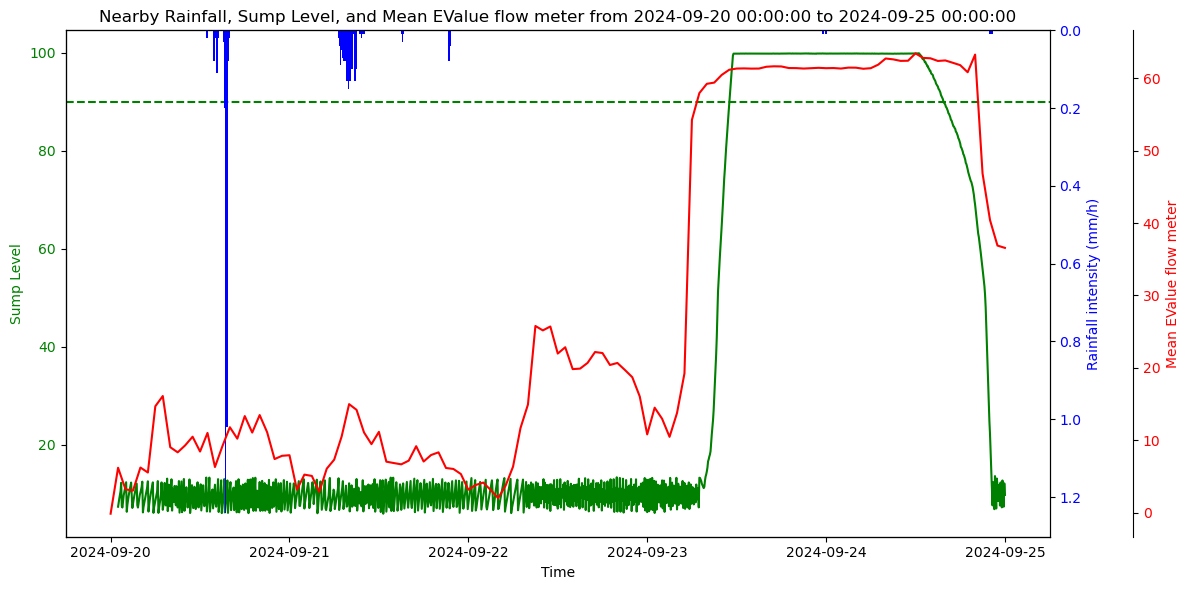

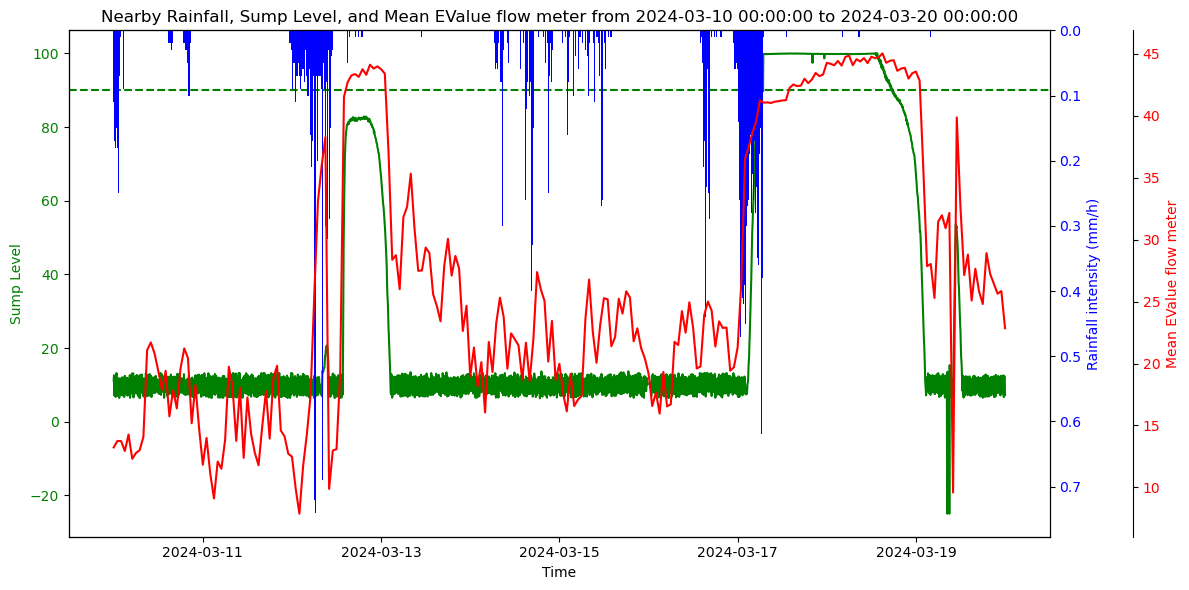

In [17]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import processing_functions


df_sump_filtered = df_raw_sump
df_rainfall_filtered = df_rainfall
df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter

def plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_time, end_time, df_raw_sump, df_rainfall, df_hour_agg_flow_meter, spill_level=None, sump_ylim=None):
    # Convert start and end times to datetime
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)

    # Filter the dataframes based on the specified time interval
    df_sump_filtered = df_raw_sump[(df_raw_sump["TimeGMT"] >= start_time) & (df_raw_sump["TimeGMT"] <= end_time)]
    df_rainfall_filtered = df_rainfall[(df_rainfall["timestamp"] >= start_time) & (df_rainfall["timestamp"] <= end_time)]
    df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter[
        (pd.to_datetime(df_hour_agg_flow_meter["Year"].astype(str) + '-' + df_hour_agg_flow_meter["Month"].astype(str) + '-' + df_hour_agg_flow_meter["Day"].astype(str) + ' ' + df_hour_agg_flow_meter["Hour"].astype(str) + ':00:00') >= start_time) & 
        (pd.to_datetime(df_hour_agg_flow_meter["Year"].astype(str) + '-' + df_hour_agg_flow_meter["Month"].astype(str) + '-' + df_hour_agg_flow_meter["Day"].astype(str) + ' ' + df_hour_agg_flow_meter["Hour"].astype(str) + ':00:00') <= end_time)
    ]

    # Sort the filtered dataframes by their respective time columns
    df_sump_filtered = df_sump_filtered.sort_values(by="TimeGMT")
    df_rainfall_filtered = df_rainfall_filtered.sort_values(by="timestamp")
    df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter_filtered.sort_values(by=["Year", "Month", "Day", "Hour"])

    # Create a figure and axis objects
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot sump level on the first y-axis
    ax1.plot(df_sump_filtered["TimeGMT"], df_sump_filtered["EValue"], color='green', label='Sump Level')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Sump Level', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Apply user-defined axis range if provided
    if sump_ylim:
        ax1.set_ylim(sump_ylim)

    # Add horizontal line for spill level if provided
    if spill_level is not None and isinstance(spill_level, (int, float)):
        ax1.axhline(y=spill_level, color='green', linestyle='--', label='Spill Level')

    # Create a second y-axis for rainfall
    ax2 = ax1.twinx()
    ax2.bar(df_rainfall_filtered["timestamp"], df_rainfall_filtered["Intensity(mm/hr)"], color='blue', label='Rainfall', width=0.01)
    ax2.set_ylabel('Rainfall intensity (mm/h)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.invert_yaxis()  # Reverse the y-axis for rainfall

    # Create a third y-axis for meanEValue
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right
    ax3.plot(
        pd.to_datetime(df_hour_agg_flow_meter_filtered["Year"].astype(str) + '-' + df_hour_agg_flow_meter_filtered["Month"].astype(str) + '-' + df_hour_agg_flow_meter_filtered["Day"].astype(str) + ' ' + df_hour_agg_flow_meter_filtered["Hour"].astype(str) + ':00:00'), 
        df_hour_agg_flow_meter_filtered["meanEValue"], color='red', label='Mean EValue'
    )
    ax3.set_ylabel('Mean EValue flow meter', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Add title and remove horizontal grid lines
    plt.title(f'Nearby Rainfall, Sump Level, and Mean EValue flow meter from {start_time} to {end_time}')
    ax1.grid(False)  # Remove horizontal grid lines from the first y-axis
    ax2.grid(False)  # Remove horizontal grid lines from the second y-axis
    ax3.grid(False)  # Remove horizontal grid lines from the third y-axis

    fig.tight_layout()

    # Show the plot
    plt.show()

# Call the function to plot the data with a spill level of 0.75

spill_level = 90

# Example usage
#processing_functions.plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_time_plot, end_time_plot, df_sump_filtered, df_rainfall_filtered, df_hour_agg_flow_meter_filtered)
for index, row in time_periods.iterrows():
    start_date_plot = row['start_date']
    end_date_plot = row['end_date']
    plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_date_plot, end_date_plot, df_sump_filtered, df_rainfall, df_hour_agg_flow_meter, spill_level=spill_level)



In [19]:
df_sump_filtered.head(5)

,TimeGMT,date,SourceSystemId,DbAddr,DbName,EValue,Year,Month,Day
0,2024-09-20 01:00:00,2024-09-20,1,11943,Default Name,7.371094,2024,9,20
1,2024-09-20 01:05:00,2024-09-20,1,11943,Default Name,8.255859,2024,9,20
2,2024-09-20 01:10:00,2024-09-20,1,11943,Default Name,9.061035,2024,9,20
3,2024-09-20 01:15:00,2024-09-20,1,11943,Default Name,9.824219,2024,9,20
4,2024-09-20 01:20:00,2024-09-20,1,11943,Default Name,10.545410,2024,9,20


In [21]:
import pandas as pd

def identify_falling_periods(df, start_date, end_date):
    """Identifies periods where EValue is falling.

    Args:
        df (pd.DataFrame): Input DataFrame.
        start_date (str): Start date for filtering.
        end_date (str): End date for filtering.

    Returns:
        pd.DataFrame: DataFrame with falling periods.
    """
    # Check if required columns exist
    required_columns = ['TimeGMT', 'EValue']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Missing required columns: {required_columns}")

    # Convert 'TimeGMT' to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['TimeGMT']):
        df['TimeGMT'] = pd.to_datetime(df['TimeGMT'])

    # Filter the DataFrame by the date range
    df = df[(df['TimeGMT'] >= start_date) & (df['TimeGMT'] <= end_date)]

    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df[['TimeGMT', 'EValue']].copy()

    # Add a new boolean column 'Falling'
    df_copy['Falling'] = df_copy['EValue'].le(df_copy['EValue'].shift())

    return df_copy




In [57]:
# Define your thresholds
your_spill_threshold = 90  # Example value, replace with actual spill level
your_on_level_threshold = 15
your_on_level_upper_limit = 20
your_sump_level_lower_limit = 60

# Define your date range
start_date_str = '2024-03-10'
end_date_str = '2024-09-27'

# Convert date strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

# Example DataFrame
# df = pd.read_csv('your_data.csv')

# Identify falling periods
falling_df = identify_falling_periods(df_sump_filtered, start_date, end_date)

#falling_df.describe()
falling_df.describe()

,TimeGMT,EValue
count,4884,4884.000000
mean,2024-05-22 06:23:07.592137728,29.296728
min,2024-03-10 00:00:00,-25.002441
25%,2024-03-14 05:43:45,8.667480
50%,2024-03-18 12:27:30,11.014893
75%,2024-09-21 19:11:15,20.688477
max,2024-09-26 00:55:00,100.035156
std,NaN,35.106288


In [59]:
def filter_falling_periods(df, spill_threshold, on_level_threshold, on_level_upper_limit, sump_level_lower_limit):
    """Filters falling periods based on specified conditions.

    Args:
        df (pd.DataFrame): DataFrame with falling periods.
        spill_threshold (float): Threshold for spill level.
        on_level_threshold (float): Threshold for on-level level.
        on_level_upper_limit (float): Upper limit for on-level level.
        sump_level_lower_limit (float): Lower limit for sump level.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    falling_periods = []
    current_period = []
    non_falling_count = 0

    for index, row in df.iterrows():
        if row['Falling'] and spill_threshold >= row['EValue'] >= on_level_threshold:
            current_period.append(row)
            non_falling_count = 0  # Reset the non-falling count
        else:
            if non_falling_count < 20:
                current_period.append(row)
                non_falling_count += 1
            else:
                if current_period:  # End of falling period
                    falling_periods.append(current_period)
                    current_period = []
                    non_falling_count = 0

    # Add the last period if it was falling
    if current_period:
        falling_periods.append(current_period)

    # Convert list of periods into separate dataframes
    falling_dfs = [pd.DataFrame(period) for period in falling_periods if period]

    filtered_falling_dfs = []
    for df in falling_dfs:
        try:
            if df['EValue'].iloc[0] >= sump_level_lower_limit and df['EValue'].iloc[-1] <= on_level_upper_limit:
                filtered_falling_dfs.append(df)
        except (KeyError, TypeError):
            print("Error processing DataFrame:", df)

    for i, df in enumerate(filtered_falling_dfs):
        df['falling_period_id'] = i

    # Combine all individual dataframes back into one dataframe if needed
    if filtered_falling_dfs:
        final_df_falling_periods = pd.concat(filtered_falling_dfs).reset_index(drop=True)
    else:
        final_df_falling_periods = pd.DataFrame()  # Return an empty DataFrame if no periods found

    return final_df_falling_periods

In [61]:
# Filter falling periods
result_is_falling = filter_falling_periods(falling_df, 
                                           spill_threshold=your_spill_threshold,
                                           on_level_threshold=your_on_level_threshold,
                                           on_level_upper_limit=your_on_level_upper_limit,
                                           sump_level_lower_limit=your_sump_level_lower_limit)

print("Resulting Falling Periods DataFrame:")
result_is_falling.head()



Resulting Falling Periods DataFrame:


,TimeGMT,EValue,Falling,falling_period_id
0,2024-09-24 15:15:00,92.254883,True,0
1,2024-09-24 15:20:00,91.958984,True,0
2,2024-09-24 15:25:00,91.410156,True,0
3,2024-09-24 15:30:00,91.150391,True,0
4,2024-09-24 15:35:00,90.847168,True,0


In [63]:
# Save the result to a xlsx file in .../data/processed
output_path = '../data/processed/result_is_falling.xlsx'
result_is_falling.to_excel(output_path, index=False)
print(f"DataFrame saved to {output_path}")


DataFrame saved to ../data/processed/result_is_falling.xlsx


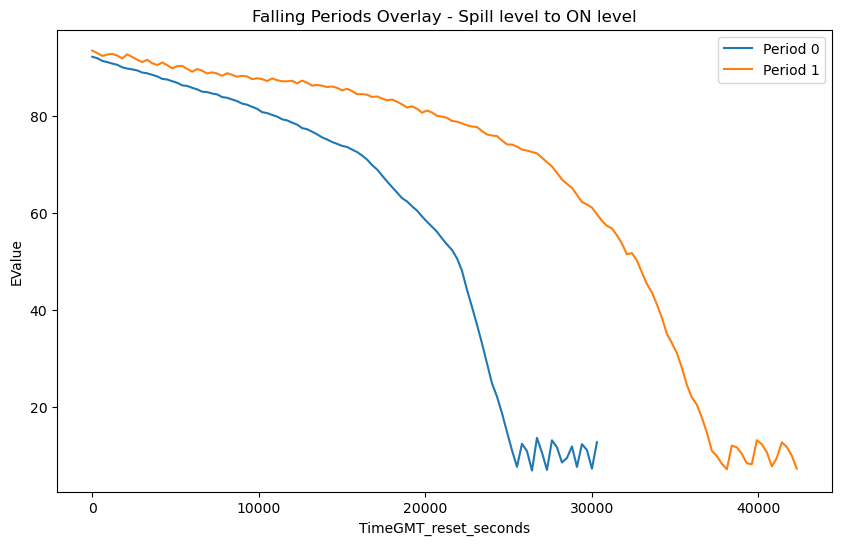

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

final_df_falling_periods = result_is_falling
# Assuming final_df_falling_periods is your dataframe from the previous steps
# Reset the TimeGMT to 0 for each falling_period_id
final_df_falling_periods['TimeGMT_reset'] = final_df_falling_periods.groupby('falling_period_id')['TimeGMT'].transform(lambda x: x - x.min())
final_df_falling_periods['TimeGMT_reset_seconds'] = final_df_falling_periods['TimeGMT_reset'].dt.total_seconds()

# Plotting
plt.figure(figsize=(10, 6))

for period_id, group in final_df_falling_periods.groupby('falling_period_id'):
    plt.plot(group['TimeGMT_reset_seconds'], group['EValue'], label=f'Period {period_id}')

plt.xlabel('TimeGMT_reset_seconds')
plt.ylabel('EValue')
plt.title('Falling Periods Overlay - Spill level to ON level')
plt.legend()
plt.show()


In [67]:

df_raw_flow_meter.rename(columns={'EValue': 'flow_reading'}, inplace=True)


In [69]:
df_raw_flow_meter.describe()

,TimeGMT,date,SourceSystemId,DbAddr,flow_reading,Year,Month,Day
count,8566,8566,8566.0,8566.0,8566.000000,8566.0,8566.0,8566.000000
mean,2024-09-23 01:34:11.998598912,2024-09-22 12:31:05.981788416,1.0,11726.0,30.173294,2024.0,9.0,22.521597
min,2024-09-20 01:00:00,2024-09-20 00:00:00,1.0,11726.0,-1.270996,2024.0,9.0,20.000000
25%,2024-09-21 13:55:15,2024-09-21 00:00:00,1.0,11726.0,-0.025879,2024.0,9.0,21.000000
50%,2024-09-23 01:36:30,2024-09-23 00:00:00,1.0,11726.0,40.896484,2024.0,9.0,23.000000
75%,2024-09-24 13:17:45,2024-09-24 00:00:00,1.0,11726.0,59.268921,2024.0,9.0,24.000000
max,2024-09-26 00:59:00,2024-09-25 00:00:00,1.0,11726.0,103.034668,2024.0,9.0,25.000000
std,NaN,NaN,0.0,0.0,30.238552,0.0,0.0,1.699336


In [71]:

def calculate_median(row, df_flow_meter):
    current_time = row['TimeGMT']
    previous_time = final_df_falling_periods.iloc[row.name - 1]['TimeGMT'] if row.name > 0 else current_time
    mask = (df_flow_meter['TimeGMT'] >= previous_time) & (df_flow_meter['TimeGMT'] <= current_time)
    median_value = df_flow_meter.loc[mask, 'flow_reading'].median()
    return median_value

# Apply the function to each row
final_df_falling_periods['median_value'] = final_df_falling_periods.apply(calculate_median, axis=1, df_flow_meter=df_raw_flow_meter)

final_df_falling_periods.head(5)


,TimeGMT,EValue,Falling,falling_period_id,TimeGMT_reset,TimeGMT_reset_seconds,median_value
0,2024-09-24 15:15:00,92.254883,True,0,0 days 00:00:00,0.0,67.230469
1,2024-09-24 15:20:00,91.958984,True,0,0 days 00:05:00,300.0,61.136719
2,2024-09-24 15:25:00,91.410156,True,0,0 days 00:10:00,600.0,66.911133
3,2024-09-24 15:30:00,91.150391,True,0,0 days 00:15:00,900.0,60.895996
4,2024-09-24 15:35:00,90.847168,True,0,0 days 00:20:00,1200.0,67.052979


In [73]:
def calculate_pumped_out_volume(row):
    if row.name == 0 or final_df_falling_periods.iloc[row.name]['falling_period_id'] != final_df_falling_periods.iloc[row.name - 1]['falling_period_id']:
        return 0
    else:
        seconds_increment = (final_df_falling_periods.iloc[row.name]['TimeGMT_reset_seconds'] - final_df_falling_periods.iloc[row.name - 1]['TimeGMT_reset_seconds'])
        return row['median_value'] * seconds_increment/ 1000   # Convert to cubic meters

# Apply the function to each row
final_df_falling_periods['pumped_out_volume'] = final_df_falling_periods.apply(calculate_pumped_out_volume, axis=1)

final_df_falling_periods.describe()

,TimeGMT,EValue,falling_period_id,TimeGMT_reset,TimeGMT_reset_seconds,median_value,pumped_out_volume
count,244,244.000000,244.000000,244,244.000000,102.000000,103.000000
mean,2024-06-06 07:11:28.524590080,64.433318,0.581967,0 days 05:10:41.803278688,18641.803279,59.042727,17.345032
min,2024-03-18 16:10:00,6.871094,0.000000,0 days 00:00:00,0.000000,-0.025879,-0.007764
25%,2024-03-18 21:13:45,50.541870,0.000000,0 days 02:30:00,9000.000000,59.833618,17.916504
50%,2024-03-19 02:17:30,77.109619,1.000000,0 days 05:02:30,18150.000000,61.323364,18.347681
75%,2024-09-24 18:36:15,86.792236,1.000000,0 days 07:35:00,27300.000000,65.441833,19.546912
max,2024-09-24 23:40:00,93.529297,1.000000,0 days 11:45:00,42300.000000,67.230469,20.145776
std,NaN,28.571442,0.494249,0 days 03:09:57.941046929,11397.941047,14.261338,4.907276


In [85]:
final_df_falling_periods.head(20)



,TimeGMT,EValue,Falling,falling_period_id,TimeGMT_reset,TimeGMT_reset_seconds,median_value,pumped_out_volume,cumulative_vol_pumped_out
0,2024-09-24 15:15:00,92.254883,True,0,0 days 00:00:00,0.0,67.230469,0.000000,0.000000
1,2024-09-24 15:20:00,91.958984,True,0,0 days 00:05:00,300.0,61.136719,18.341016,18.341016
2,2024-09-24 15:25:00,91.410156,True,0,0 days 00:10:00,600.0,66.911133,20.073340,38.414355
3,2024-09-24 15:30:00,91.150391,True,0,0 days 00:15:00,900.0,60.895996,18.268799,56.683154
4,2024-09-24 15:35:00,90.847168,True,0,0 days 00:20:00,1200.0,67.052979,20.115894,76.799048
5,2024-09-24 15:40:00,90.598633,True,0,0 days 00:25:00,1500.0,61.156982,18.347095,95.146143
6,2024-09-24 15:45:00,90.078125,True,0,0 days 00:30:00,1800.0,66.666748,20.000024,115.146167
7,2024-09-24 15:50:00,89.818359,True,0,0 days 00:35:00,2100.0,61.437500,18.431250,133.577417
8,2024-09-24 15:55:00,89.651855,True,0,0 days 00:40:00,2400.0,67.152588,20.145776,153.723193
9,2024-09-24 16:00:00,89.429688,True,0,0 days 00:45:00,2700.0,60.066895,18.020068,171.743262


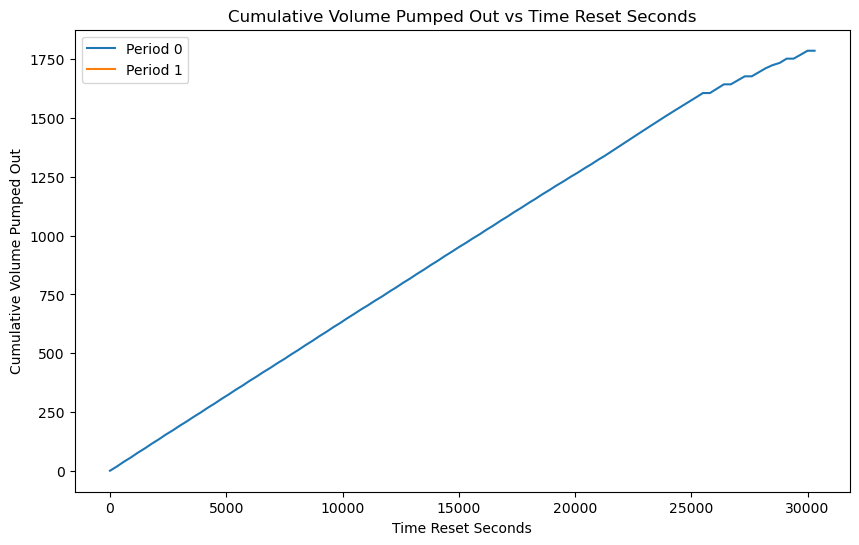

In [77]:
final_df_falling_periods['cumulative_vol_pumped_out'] = final_df_falling_periods.groupby('falling_period_id')['pumped_out_volume'].cumsum()

# Plotting the graph
plt.figure(figsize=(10,6))

# Loop through each unique falling_period_id and plot the corresponding data
for period_id in final_df_falling_periods['falling_period_id'].unique():
    period_data = final_df_falling_periods[final_df_falling_periods['falling_period_id'] == period_id]
    plt.plot(period_data['TimeGMT_reset_seconds'], period_data['cumulative_vol_pumped_out'], label=f'Period {period_id}')

# Adding labels and title
plt.xlabel('Time Reset Seconds')
plt.ylabel('Cumulative Volume Pumped Out')
plt.title('Cumulative Volume Pumped Out vs Time Reset Seconds')
plt.legend()

# Show the plot
plt.show()
